# Librerías Modelo

In [1]:
!pip install torch torchvision torchnet \
            scikit-image rasterio geopandas shapely \
            pandas opencv-python tqdm

In [2]:
!pip install --upgrade openpyxl

# Repositorio Modelo

In [18]:
!git clone https://github.com/jsantidrian/multi-task-L-UNet.git "C:\Users\javie\Downloads\github_modelo"

Cloning into 'C:\Users\javie\Downloads\github_modelo'...


# Entrenamiento Modelo

In [ ]:
# obliga a Python a funcionar en modo unbuffered (-u)
!python -u "C:/Users/javie/Downloads/github_modelo/code/main.py" \
    --data_folder    "C:\Users\javie\Downloads\datos\data_mix_48_fixed_square" \
    --patch_size     48 \
    --nb_dates       2 \
    --epochs         10000 \
    --base_save_dir  "C:/Users/javie/Downloads/resultados_modelo" \
    --experiment_name "model_mix_48x48_10000eps"

C:\Users\javie\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (

100%|##########| 60/60 [00:28<00:00,  2.08it/s]

100%|##########| 52/52 [00:05<00:00,  9.21it/s]

100%|##########| 60/60 [00:25<00:00,  2.32it/s]

100%|##########| 52/52 [00:06<00:00,  8.02it/s]

100%|##########| 60/60 [00:26<00:00,  2.26it/s]

100%|##########| 52/52 [00:06<00:00,  7.91it/s]

100%|##########| 60/60 [00:28<00:00,  2.11it/s]

100%|##########| 52/52 [00:06<00:00,  7.71it/s]

100%|##########| 60/60 [00:33<00:00,  1.79it/s]

100%|##########| 52/52 [00:06<00:00,  7.54it/s]

100%|##########| 60/60 [00:45<00:00,  1.31it/s]

100%|##########| 52/52 [00:06<00:00,  7.59it/s]

100%|##########| 60/60 [00:28<00:00,  2.08it/s]

100%|##########| 52/52 [00:07<00:00,  6.77it/s]

100%|##########| 60/60 [00:42<00:00,  1.40it/s]

100%|##########| 52/52 [00:10<00:00,  5.18it/s]

10

Train (ep 1/30) [0/60 (0%)]	Loss: 0.605484	Acc: 81.86
Epoch 1 TRAIN_LOSS: 0.407  TRAIN_ACC: 93.397
Epoch 1 VAL_LOSS: 0.347  VAL_ACC: 96.777%  P:0.331  R:0.971  F1:0.493  IoU:0.327
Train (ep 2/30) [0/60 (0%)]	Loss: 0.342877	Acc: 96.18
Epoch 2 TRAIN_LOSS: 0.312  TRAIN_ACC: 96.413
Epoch 2 VAL_LOSS: 0.294  VAL_ACC: 97.474%  P:0.387  R:0.962  F1:0.552  IoU:0.381
Train (ep 3/30) [0/60 (0%)]	Loss: 0.276768	Acc: 97.44
Epoch 3 TRAIN_LOSS: 0.279  TRAIN_ACC: 97.232
Epoch 3 VAL_LOSS: 0.270  VAL_ACC: 97.278%  P:0.368  R:0.959  F1:0.532  IoU:0.363
Train (ep 4/30) [0/60 (0%)]	Loss: 0.273005	Acc: 97.40
Epoch 4 TRAIN_LOSS: 0.258  TRAIN_ACC: 97.367
Epoch 4 VAL_LOSS: 0.251  VAL_ACC: 97.520%  P:0.390  R:0.948  F1:0.553  IoU:0.382
Train (ep 5/30) [0/60 (0%)]	Loss: 0.251479	Acc: 97.18
Epoch 5 TRAIN_LOSS: 0.241  TRAIN_ACC: 97.297
Epoch 5 VAL_LOSS: 0.233  VAL_ACC: 97.913%  P:0.433  R:0.940  F1:0.593  IoU:0.421
Train (ep 6/30) [0/60 (0%)]	Loss: 0.248747	Acc: 97.66
Epoch 6 TRAIN_LOSS: 0.227  TRAIN_ACC: 97.484
E

# Resultados Métricas

In [7]:
import pandas as pd
import openpyxl

# 1) Carpeta donde main.py dejó los resultados:
save_folder = r"C:\Users\javie\Downloads\resultados_modelo\model_mix_48x48_10eps"

# 2) Si tienes un history.xlsx:
history = pd.read_excel(f"{save_folder}/history.xlsx")

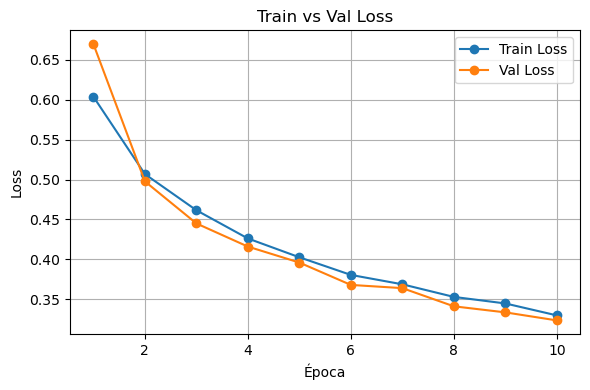

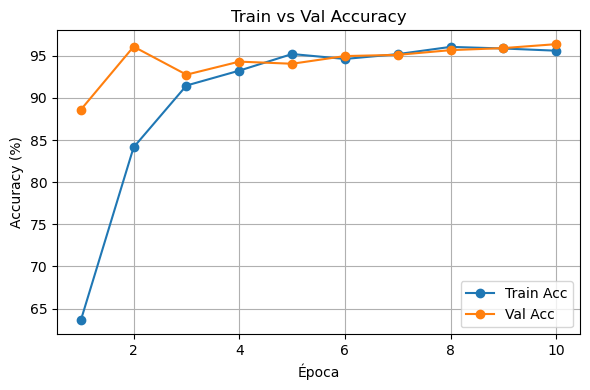

In [8]:
import matplotlib.pyplot as plt

# --- Pérdidas ---
plt.figure(figsize=(6,4))
plt.plot(history['epoch'], history['train_loss'], marker='o', label='Train Loss')
plt.plot(history['epoch'], history['val_loss'],   marker='o', label='Val Loss')
plt.xlabel("Época"); plt.ylabel("Loss")
plt.title("Train vs Val Loss"); plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# --- Accuracy ---
plt.figure(figsize=(6,4))
plt.plot(history['epoch'], history['train_acc'], marker='o', label='Train Acc')
plt.plot(history['epoch'], history['val_acc'],   marker='o', label='Val Acc')
plt.xlabel("Época"); plt.ylabel("Accuracy (%)")
plt.title("Train vs Val Accuracy"); plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

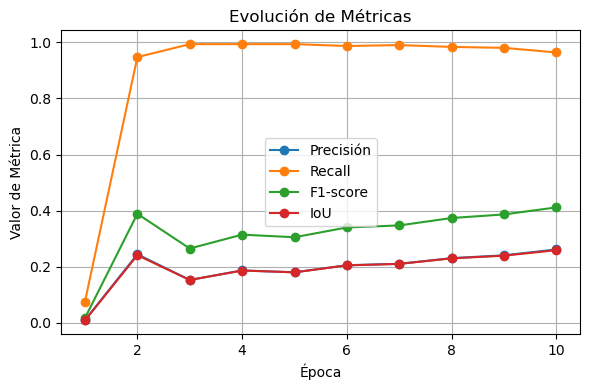

In [14]:
plt.figure(figsize=(6,4))
plt.plot(history['epoch'], history['prec'], marker='o', label='Precisión')
plt.plot(history['epoch'], history['rec'],  marker='o', label='Recall')
plt.plot(history['epoch'], history['f1'],   marker='o', label='F1-score')
plt.plot(history['epoch'], history['iou'],  marker='o', label='IoU')
plt.xlabel("Época"); plt.ylabel("Valor de Métrica")
plt.title("Evolución de Métricas"); plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# Visualizaciones Predicciones

In [ ]:
#import sys
# Apunta a la carpeta donde resides network.py
#sys.path.insert(0, r"C:\Users\javie\Downloads\github_modelo\code")

#import pandas as pd
#import torch
#from network import U_Net

# 1) Carpeta donde main.py dejó los resultados:
#save_folder = r"C:\Users\javie\Downloads\resultados_modelo\model_mix_48x48_10000eps"

# 2) Si tienes un history.xlsx:
#history = pd.read_excel(f"{save_folder}/history.xlsx")

# 3) Cargar tu checkpoint de la última época:
#model = U_Net(img_ch=4, output_ch=2, patch_size=48).cuda().eval()
#ckpt = torch.load(f"{save_folder}/model_mix_48x48_10000eps_epoch10000.pt")
#model.load_state_dict(ckpt)

# 4) Mostrar últimas líneas de history
#history.tail()

In [ ]:
#import pandas as pd
#import torch
#from network import U_Net

# 1) Carpeta donde main.py dejó los resultados:
#save_folder = r"C:\Users\javie\Downloads\resultados_modelo\model_mix_48x48_10000eps"

# 2) Leemos el historial completo:
#history = pd.read_excel(f"{save_folder}/history.xlsx")

# 3) Cargamos el checkpoint final (época 10000):
#model = U_Net(img_ch=4, output_ch=2, patch_size=48)
#ckpt = torch.load(f"{save_folder}/model_mix_48x48_10000eps_epoch0010.pt")
#model.load_state_dict(ckpt)
#model = model.cuda().eval()

# 4) Mostramos las últimas filas de history:
#history.tail()

In [10]:
import numpy as np, seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from load_data import MTPDataset, AlbWrapper  # o la clase que uses

# Repite aquí tu código de fine_tuning.ipynb para construir:
# df_permisos, min_pixel, max_pixel, df_permisos['stratum'], 
# train_idx, val_idx, train_loader, val_loader, ids_train, ids_val, etc.

# Finalmente:
bins = np.arange(min_pixel-0.1, max_pixel+0.1, 5)
fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.histplot(df_permisos[df_permisos['id_permiso'].isin(ids_train)]['pixeles'],
             bins=bins, kde=True, ax=axes[0])
axes[0].set(title="Distribución Train")

sns.histplot(df_permisos[df_permisos['id_permiso'].isin(ids_val)]['pixeles'],
             bins=bins, kde=True, ax=axes[1])
axes[1].set(title="Distribución Val")

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'load_data'

In [ ]:
from model_evaluation import evaluate, metricas_permisos, plot_pixel_metrics, plot_before_after_pred_mask

# 1) Metrics en train y val:
metrics_tr = evaluate(model, train_loader, device='cuda', threshold=0.4, save_preds=False)
metrics_vl = evaluate(model, val_loader,   device='cuda', threshold=0.4, save_preds=False)

print("=== Training Metrics ===")
print(f"Mean IoU: {metrics_tr['mean_iou']:.4f}   Mean F1: {metrics_tr['mean_f1']:.4f}")
print("=== Validation Metrics ===")
print(f"Mean IoU: {metrics_vl['mean_iou']:.4f}   Mean F1: {metrics_vl['mean_f1']:.4f}")

# 2) Métricas por permiso y violinplot:
df_val_pix = metricas_permisos(metrics_vl, df_permisos)
plot_pixel_metrics(df_val_pix,
                   metrics=['recalls','precisions','f1s','accuracies'],
                   colors={'recalls':'red','precisions':'green','f1s':'blue','accuracies':'orange'})
sns.violinplot(y='f1s', data=df_val_pix)
plt.title("F1 per Permiso (Val)"); plt.tight_layout(); plt.show()

In [ ]:
# Muestra un puñado de ejemplos del conjunto de validación:
for pid in ids_val[:5]:
    print("Permiso:", pid)
    plot_before_after_pred_mask(pid, root_dir, pred_dir="pred_finetune",
                                overlay_before=False, overlay_after=True)

## Antes

In [ ]:
import pandas as pd
import re

# 1. Ruta al archivo
path = r"C:\Users\javie\Downloads\resultados_modelo\model_48x48_10000eps\progress.txt"

# 2. Leer líneas y saltar cabecera
with open(path, 'r') as f:
    lines = f.readlines()[1:]

# 3. Extraer con regex
data = []
pat = re.compile(
    r'Epoch\s+(\d+)\s+'
    r'train_acc:([\d\.]+)%\s+'
    r'val_acc:([\d\.]+)%\s+'
    r'train_loss:([\d\.]+)\s+'
    r'val_loss:([\d\.]+)\s+'
    r'P:([\d\.]+)\s+'
    r'R:([\d\.]+)\s+'
    r'F1:([\d\.]+)\s+'
    r'IoU:([\d\.]+)'
)
for L in lines:
    m = pat.match(L.strip())
    if not m:
        continue
    e, ta, va, tl, vl, p, r, f1, iou = m.groups()
    data.append({
        'epoch':      int(e),
        'train_acc':  float(ta),
        'val_acc':    float(va),
        'train_loss': float(tl),
        'val_loss':   float(vl),
        'prec':       float(p),
        'rec':        float(r),
        'f1':         float(f1),
        'iou':        float(iou),
    })

df = pd.DataFrame(data)

# 4. Filtrar solo la fila de epoch=10000 y mostrarla
df_10000 = df[df['epoch'] == 10000]
display(df_10000)

* **epoch**: Número de pase completo sobre todo el conjunto de datos (iteración de entrenamiento).
* **train\_acc**: Precisión del modelo en los datos de entrenamiento (% de predicciones correctas durante el entrenamiento).
* **val\_acc**: Precisión del modelo en el conjunto de validación (% de predicciones correctas en datos no vistos durante el entrenamiento).
* **train\_loss**: Valor de la función de pérdida promedio en entrenamiento (cuánto “error” comete el modelo al ajustar los datos de entrenamiento).
* **val\_loss**: Valor de la función de pérdida promedio en validación (error del modelo al generalizar a datos nuevos).


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# 1) Ruta a tu progress.txt:
file_path = r"C:\Users\javie\Downloads\resultados_modelo\model_48x48_10000eps\progress.txt"

# 2) Parsear líneas y quedarnos con epoch y train_loss:
records = []
pattern = re.compile(
    r"Epoch\s+(\d+)\s+train_acc:[\d\.]+%\s+val_acc:[\d\.]+%\s+train_loss:(\d+\.?\d*)\s+val_loss:(\d+\.?\d*)"
)
with open(file_path, "r") as f:
    for line in f:
        m = pattern.match(line)
        if m:
            records.append({
                "epoch":      int(m.group(1)),
                "train_loss": float(m.group(2))
            })

# 3) Lo metemos en un DataFrame:
df = pd.DataFrame(records)

# 4) Graficamos solo training loss:
plt.figure()
plt.plot(df["epoch"], df["train_loss"], marker="o")
plt.xlabel("Época")
plt.ylabel("Training Loss")
plt.title("Evolución del Training Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['prec'], label='Precisión', color='blue')
plt.plot(df['epoch'], df['rec'],  label='Recall',    color='orange')
plt.plot(df['epoch'], df['f1'],   label='F1-score',  color='green')
plt.plot(df['epoch'], df['iou'],  label='IoU',       color='red')

plt.xlabel('Época')
plt.ylabel('Valor de la Métrica')
plt.title('Evolución de Precisión, Recall, F1 y IoU')
plt.legend()
plt.grid(True)
plt.show()

* **prec** (Precisión): De todas las predicciones positivas, proporción de verdaderos positivos (mide la exactitud de las detecciones positivas).
* **rec** (Recall): Proporción de verdaderos positivos detectados sobre el total de positivos reales (mide la sensibilidad).
* **f1** (F1-score): Media armónica entre precisión y recall (balance entre exactitud y sensibilidad).
* **iou** (IoU): Intersección sobre la unión entre predicciones y etiquetas reales (cuánto se solapan las áreas predichas con las reales).

Corregir sobreajuste:
- Estructura red
- Agregar datos
- Agregar multitemporalidad